In [38]:
## read the .sexcheck file
import pandas as pd
import re



sexcheck_2caller = pd.read_csv('/Users/danfengc/projects/VCF GWAS concordance/data/GPC_COGS_CAU_Psych_2caller.sexcheck',
                               sep=r"\s+")
sexcheck_merge = pd.read_csv('/Users/danfengc/projects/VCF GWAS concordance/data/GPC_COGS_CAU_Psych_merge.sexcheck',
                          sep=r"\s+")
sexcheck_vcf = pd.read_csv('/Users/danfengc/projects/VCF GWAS concordance/data/standardized.vcf.sexcheck',
                          sep=r"\s+")

In [39]:
sexcheck_2caller_male = sexcheck_2caller[sexcheck_2caller['PEDSEX'] == 1]
sexcheck_merge_male = sexcheck_merge[sexcheck_merge['PEDSEX'] == 1]
sexcheck_vcf_male = sexcheck_vcf[sexcheck_vcf['PEDSEX'] == 1]
sexcheck_2caller_female = sexcheck_2caller[sexcheck_2caller['PEDSEX'] == 2]
sexcheck_merge_female = sexcheck_merge[sexcheck_merge['PEDSEX'] == 2]
sexcheck_vcf_female = sexcheck_vcf[sexcheck_vcf['PEDSEX'] == 2]

### F statistics ~ Y Count 

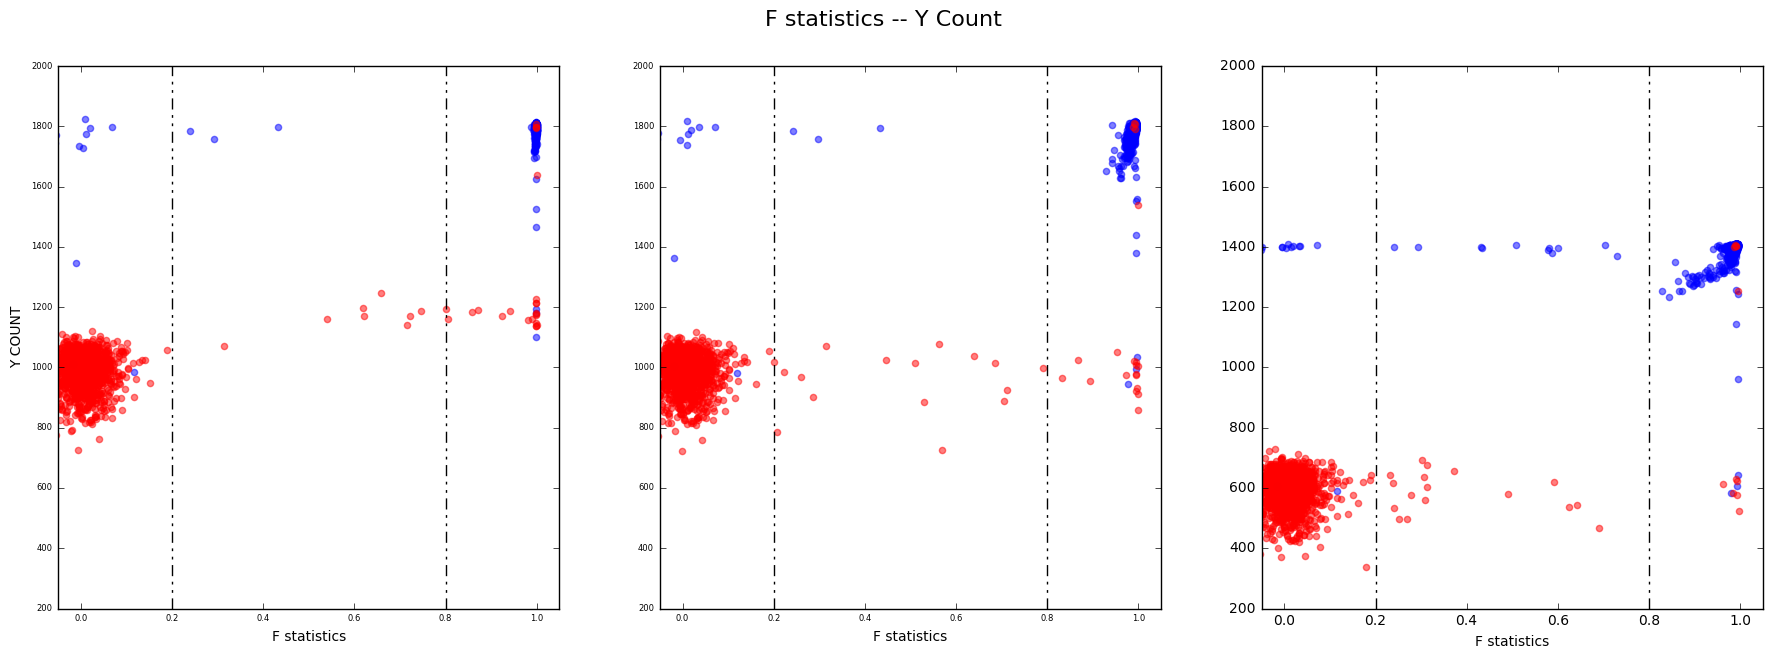

In [40]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.figure(num=None, figsize=(22, 7), dpi=80, facecolor='w', edgecolor='k')
plt.suptitle("F statistics -- Y Count", fontsize=16)

ax1 = plt.subplot(131)

plt.scatter(sexcheck_merge_male['F'],
            sexcheck_merge_male['YCOUNT'], 
            alpha=0.5,
            color='blue')

plt.scatter(sexcheck_merge_female['F'],
            sexcheck_merge_female['YCOUNT'], 
            alpha=0.5,
            color='red')
plt.axvline(0.2, color='black', dashes=[8, 4, 2, 4, 2, 4])
plt.axvline(0.8, color='black', dashes=[8, 4, 2, 4, 2, 4])
#plt.axhline(0, color='red', dashes=[8, 4, 2, 4, 2, 4])

plt.setp(ax1.get_xticklabels(), fontsize=6)
plt.setp(ax1.get_yticklabels(), fontsize=6)
plt.ylabel("Y COUNT")
plt.xlabel("F statistics")


ax2 = plt.subplot(132, sharex=ax1, sharey=ax1)

plt.scatter(sexcheck_2caller_male['F'],
            sexcheck_2caller_male['YCOUNT'], 
            label='2caller_male',
            alpha=0.5,
            color='blue')

plt.scatter(sexcheck_2caller_female['F'],
            sexcheck_2caller_female['YCOUNT'], 
            label='2caller_female',
            alpha=0.5,
            color='red')
plt.axvline(0.2, color='black', dashes=[8, 4, 2, 4, 2, 4])
plt.axvline(0.8, color='black', dashes=[8, 4, 2, 4, 2, 4])
plt.xlabel("F statistics")
#plt.axhline(0, color='red', dashes=[8, 4, 2, 4, 2, 4])

plt.setp(ax2.get_xticklabels(), fontsize=6)
plt.setp(ax2.get_yticklabels(), fontsize=6)




ax3 = plt.subplot(133, sharex=ax1, sharey=ax1)

plt.scatter(sexcheck_vcf_male['F'],
            sexcheck_vcf_male['YCOUNT'], 
            label='vcf_male',
            alpha=0.5,
            color='blue')

plt.scatter(sexcheck_vcf_female['F'],
            sexcheck_vcf_female['YCOUNT'], 
            label='vcf_female',
            alpha=0.5,
            color='red')
plt.axvline(0.2, color='black', dashes=[8, 4, 2, 4, 2, 4])
plt.axvline(0.8, color='black', dashes=[8, 4, 2, 4, 2, 4])
plt.setp(ax2.get_xticklabels(), fontsize=6)
plt.setp(ax2.get_yticklabels(), fontsize=6)
plt.xlabel("F statistics")

plt.xlim(-0.05, 1.05)
plt.ylim(200, 2000)



plt.savefig('/Users/danfengc/projects/VCF GWAS concordance/concordance_check/plots/f_stat_ycount.pdf',
           figsize=(22, 7),          
            dpi=80,          
            bbox_inches='tight')

In [41]:
#sexcheck_vcf.head()

In [42]:
sexcheck_tmp = sexcheck_2caller.merge(sexcheck_merge,
                                     left_on = 'IID',
                                     right_on = 'IID',
                                     how = 'inner')
sexcheck_all = sexcheck_tmp.merge(sexcheck_vcf,
                                     left_on = 'IID',
                                     right_on = 'IID',
                                     how = 'inner')
                    


In [43]:
#sexcheck_all.head()

### F statistics comparison

In [44]:
sexcheck_allmale = sexcheck_all[sexcheck_all['PEDSEX_x'] == 1]

In [45]:
sexcheck_allfemale = sexcheck_all[sexcheck_all['PEDSEX_x'] == 2]

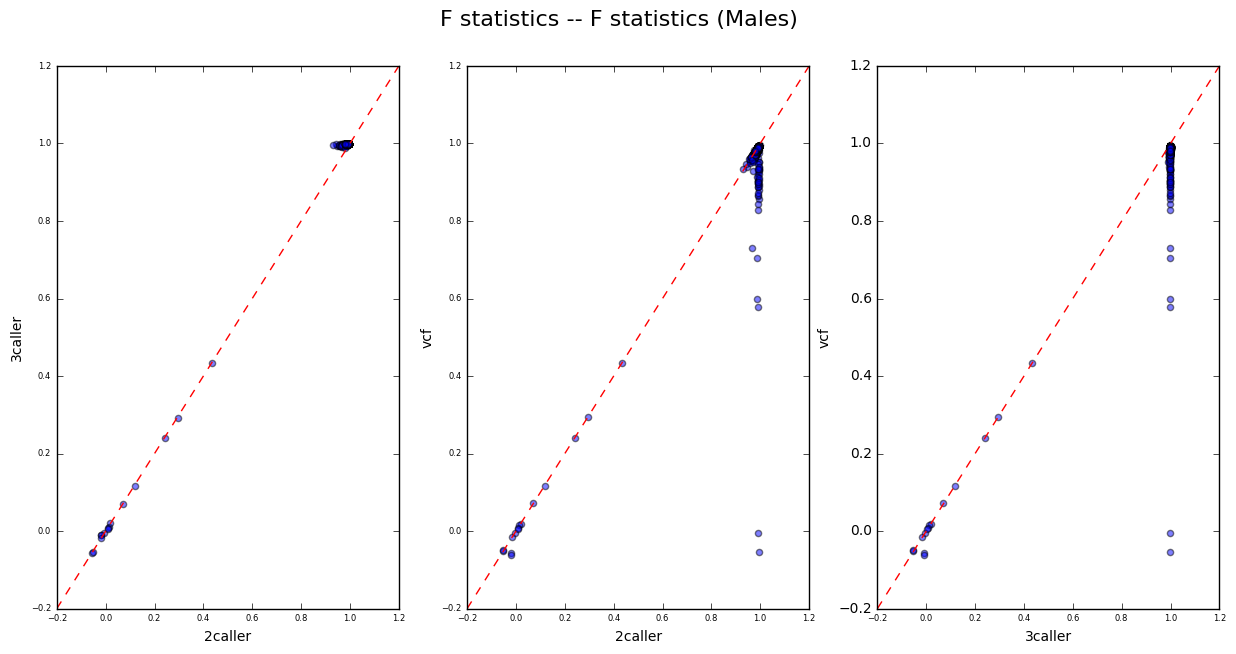

In [46]:
plt.figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
plt.suptitle("F statistics -- F statistics (Males)", fontsize=16)

ax1 = plt.subplot(131)

plt.scatter(sexcheck_allmale['F_x'],
            sexcheck_allmale['F_y'], 
            label='2caller_3caller',
            alpha=0.5)
plt.plot(np.array([-0.2, 1.2]), np.array([-0.2, 1.2]), color='red', linestyle='--')
#plt.axhline(0, color='red', dashes=[8, 4, 2, 4, 2, 4])

plt.setp(ax1.get_xticklabels(), fontsize=6)
plt.setp(ax1.get_yticklabels(), fontsize=6)
plt.ylabel("3caller")
plt.xlabel("2caller")


ax2 = plt.subplot(132, sharex=ax1, sharey=ax1)
plt.scatter(sexcheck_allmale['F_x'],
            sexcheck_allmale['F'], 
            label='2caller_vcf',
            alpha=0.5)
plt.plot(np.array([-0.2, 1.2]), np.array([-0.2, 1.2]), color='red', linestyle='--')
#plt.axhline(0, color='red', dashes=[8, 4, 2, 4, 2, 4])

plt.setp(ax2.get_xticklabels(), fontsize=6)
plt.setp(ax2.get_yticklabels(), fontsize=6)
plt.ylabel("vcf")
plt.xlabel("2caller")



ax3 = plt.subplot(133, sharex=ax1, sharey=ax1)
plt.scatter(sexcheck_allmale['F_y'], 
            sexcheck_allmale['F'], 
            label='3caller - vcf', 
            alpha=0.5)
plt.plot(np.array([-0.2, 1.2]), np.array([-0.2, 1.2]), color='red', linestyle='--')
plt.setp(ax3.get_xticklabels(), fontsize=6)
plt.setp(ax2.get_yticklabels(), fontsize=6)
plt.ylabel("vcf")
plt.xlabel("3caller")
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)

plt.savefig('/Users/danfengc/projects/VCF GWAS concordance/concordance_check/plots/f_stat_comparison_males.pdf',
            figsize=(15, 7), 
            dpi=80, 
            bbox_inches='tight')

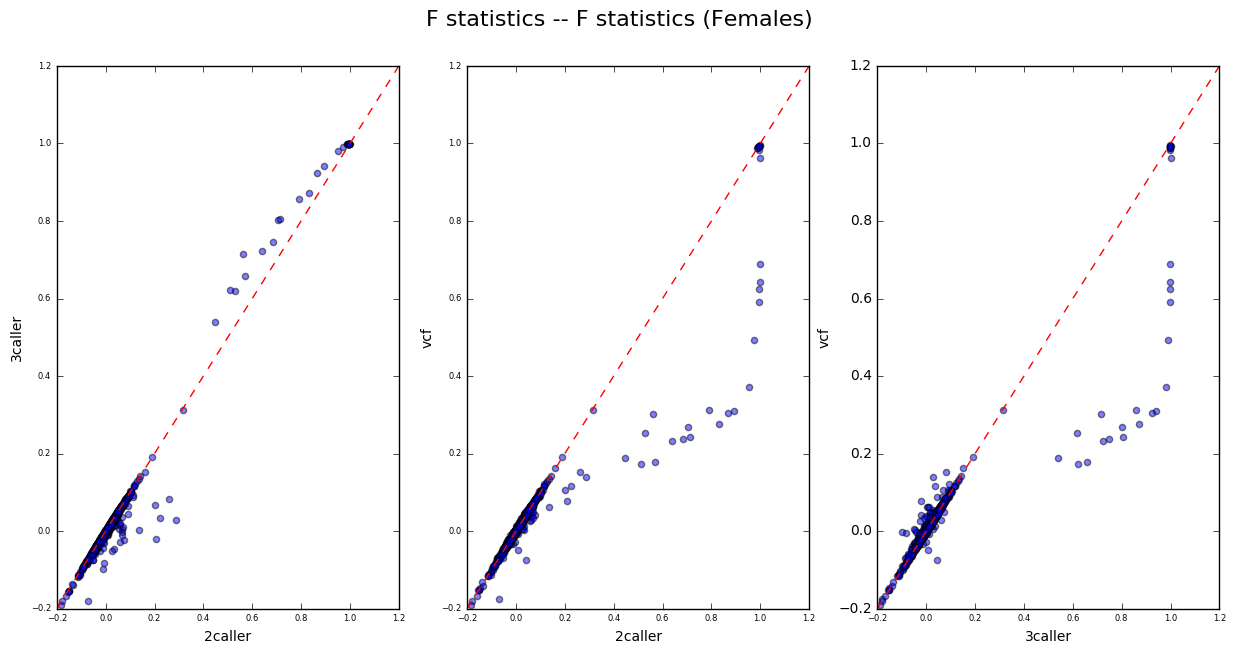

In [47]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
plt.suptitle("F statistics -- F statistics (Females)", fontsize=16)

ax1 = plt.subplot(131)

plt.scatter(sexcheck_allfemale['F_x'],
            sexcheck_allfemale['F_y'], 
            label='2caller_3caller',
            alpha=0.5)
plt.plot(np.array([-0.2, 1.2]), np.array([-0.2, 1.2]), color='red', linestyle='--')
#plt.axhline(0, color='red', dashes=[8, 4, 2, 4, 2, 4])

plt.setp(ax1.get_xticklabels(), fontsize=6)
plt.setp(ax1.get_yticklabels(), fontsize=6)
plt.ylabel("3caller")
plt.xlabel("2caller")


ax2 = plt.subplot(132, sharex=ax1, sharey=ax1)
plt.scatter(sexcheck_allfemale['F_x'],
            sexcheck_allfemale['F'], 
            label='2caller_vcf',
            alpha=0.5)
plt.plot(np.array([-0.2, 1.2]), np.array([-0.2, 1.2]), color='red', linestyle='--')
#plt.axhline(0, color='red', dashes=[8, 4, 2, 4, 2, 4])

plt.setp(ax2.get_xticklabels(), fontsize=6)
plt.setp(ax2.get_yticklabels(), fontsize=6)
plt.ylabel("vcf")
plt.xlabel("2caller")



ax3 = plt.subplot(133, sharex=ax1, sharey=ax1)
plt.scatter(sexcheck_allfemale['F_y'], 
            sexcheck_allfemale['F'], 
            label='3caller - vcf', 
            alpha=0.5)
plt.plot(np.array([-0.2, 1.2]), np.array([-0.2, 1.2]), color='red', linestyle='--')
plt.setp(ax3.get_xticklabels(), fontsize=6)
plt.setp(ax2.get_yticklabels(), fontsize=6)
plt.ylabel("vcf")
plt.xlabel("3caller")
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)

plt.savefig('/Users/danfengc/projects/VCF GWAS concordance/concordance_check/plots/f_stat_comparison_females.pdf',
            figsize=(15, 7), 
            dpi=80, 
            bbox_inches='tight')